In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/temp')
os.getcwd()

'/content/drive/MyDrive/temp'

# selenium on colab ÊñπÊ≥ï
ÂèÉËÄÉ:
https://stackoverflow.com/questions/67948478/python-using-selenium-in-google-colab-to-automatically-input-data-into-google-d

ÂèÉËÄÉ: https://cyublog.com/articles/python-zh/colab-tutorial-selenium/

In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
#!cp /usr/lib/chromium-browser/chromedriver /usr/bin

'apt-get' ‰∏çÊòØÂÖßÈÉ®ÊàñÂ§ñÈÉ®ÂëΩ‰ª§„ÄÅÂèØÂü∑Ë°åÁöÑÁ®ãÂºèÊàñÊâπÊ¨°Ê™î„ÄÇ
'apt' ‰∏çÊòØÂÖßÈÉ®ÊàñÂ§ñÈÉ®ÂëΩ‰ª§„ÄÅÂèØÂü∑Ë°åÁöÑÁ®ãÂºèÊàñÊâπÊ¨°Ê™î„ÄÇ


In [68]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
# È†êË®≠Ë™ûË®Ä
chrome_options.add_argument("--lang=zh-TW.UTF-8")
#wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver = webdriver.Chrome('chromedriver', options=chrome_options)
driver.implicitly_wait(10)
#wait = WebDriverWait(driver, 10)
driver.close() 

# ÂØ¶‰Ωú

Notes: 
1. colab Ë≤å‰ººÁÑ°Ê≥ï‰ΩøÁî®pyautogui 
  >> ÁÑ°Ê≥ïÁî® pyautogui Êìç‰ΩúÈ†ÅÈù¢
2. colab pynput ‰∫¶ÁÑ°Ê≥ï‰ΩøÁî®(Linux Á≥ªÁµ± ÔºÜ ÁÑ°import gui Áñë‰ºº‰πüÁÑ°Ê≥ï‰ΩøÁî® 

## GOOGLE MAP ÊäìÂèñ


#### import

In [69]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
#import pyautogui 
from selenium.webdriver import ActionChains
#from pynput.keyboard import Key, Controller
import pandas as pd
import requests
from selenium.webdriver.common.by import By
from pathlib import Path
import urllib
import os

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### define function Ôºö make folder  

In [70]:
#Âª∫Á´ãË≥áÊñôÂ§æ
#query ÁÇ∫‰πãÂæåÊúÉË®≠Ë®àÁöÑËÆäÊï∏(Âú∞ÂçÄ„ÄÅÂêç)
def make_dir(query):
  try:
      dis_name = query +'_data'
      dis_name1 = query + '_images'
      os.mkdir(dis_name)
      os.mkdir(dis_name1)
  except:
      pass

#### define function ÔºöÂ∫óÂÆ∂Ë≥áË®äÊäìÂèñ

In [86]:
# google map Â∫óÂÆ∂Ë≥áË®äÊäìÂèñ(with star and comment_count)
def find_data(query, N=5):
  driver = webdriver.Chrome('chromedriver', options=chrome_options)
  translation_a = urllib.parse.quote(query)
  driver.get('https://www.google.com.tw/maps/search/' + translation_a + '/data=!3m1!4b1?hl=zh-TW')

  # Â∞áÊ¨≤Êî∂ÈõÜË≥áÊñôÂª∫Á´ãÁ©∫list
  href_link_list, title_list, star_list, comm_list  = [], [], [], []

  # Ëø¥ÂúàÊäìÂèñÊ∏ÖÂñÆ, NÁ≠âÊñºÈªûÈÅ∏‰∏ã‰∏ÄÈ†ÅÁöÑÊ¨°Êï∏
  for _ in range(N): #ËÆÄÂèñÁ∂≤È†ÅË≥áÊñô
    # scroll down
    element = driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]')
    for _ in range(15):
      time.sleep(1)
      # ÊñπÊ≥ï1: script 
      #driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", element)
      # ÊñπÊ≥ï2: send_keys
      element.send_keys(Keys.PAGE_DOWN)
      
    #ÂàÜÊûêÁ∂≤È†Å
    soup = BeautifulSoup(driver.page_source)
    
    #ÂàóË°®ÂÖßÊâÄÊúâË≥áË®ä
    all_finding = soup.find_all('div', {'class': 'Nv2PK THOPZb CpccDe'})
    for temp_div in all_finding:
      #Âü∫Êú¨Ë≥áÊñô(Ê®ôÈ°å(Â∫óÂêç)„ÄÅÈÄ£Áµê)
      herf = temp_div.find('a', {'class': 'hfpxzc'})
      href_link = herf.get('href')
      title = herf.get('aria-label')
      href_link_list.append(href_link)
      title_list.append(title)

      # Ë©ïË´ñËàáÊòüÁ¥ö
      find_star = temp_div.find('span', {'class': 'ZkP5Je'})
      if find_star:
        star_list.append(find_star.text.split('(')[0].replace(',', '.'))
        try:
          comm_list.append(find_star.text.split('(')[1].replace(')', ''))
        except find_star.text.split('(')[1].replace(')', '') :
          comm_list.append(find_star.text.split('(')[1].replace(')', ''))
        except find_star.text.split('(')[0] :
          comm_list.append(find_star.text.split('(')[0])
      else:
        star_list.append("0")
        comm_list.append("0")

    #print(len(title_list),len(href_link_list), len(star_list),len(comm_list))
    print(f"Â∑≤ÊäìÂèñ {len(title_list)} Á≠Ü{query}Â∫óÂÆ∂Ë≥áÊñô")

    # next page button
    driver.find_element(By.ID, 'eY4Fjd').click()
    time.sleep(2)
    
  driver.close() 

  #ÂØ´ÈÄ≤df
  df = pd.DataFrame()
  df['Â∫óÂêç'] = title_list
  df['Á∂≤ÂùÄ'] = href_link_list
  df['ÊòüÁ¥ö'] = star_list
  df['Ë©ïË´ñÊï∏Èáè'] = comm_list
  df.to_csv(query +'_data/' + query + '_ÂïÜÂÆ∂Á∂≤ÂùÄÈÄ£Áµê.csv', index=False, encoding='utf-8-sig')

#find_data('Âè∞‰∏≠Ë•øÂçÄÁáíËÇâ', N=1)
#ÂèØÊâìÈñã‰∏äÊñπË®ªËß£Ê∏¨Ë©¶

#### define function : ÁØ©ÈÅ∏Ë©ïË´ñ

In [87]:
#Âè™ÁïôÂ§ßÊñºË©ïË´ñ500ÔºåÊòüÁ¥öÈ´òÊñº4.2
def filter_data(query, count=500, star=4.2, delete_list=['‰æøÁï∂']):
  df = pd.read_csv(query +'_data/' +query + '_ÂïÜÂÆ∂Á∂≤ÂùÄÈÄ£Áµê.csv')
  df['Ë©ïË´ñÊï∏Èáè'] = df['Ë©ïË´ñÊï∏Èáè'].replace('Ê≤íÊúâË©ïË´ñ', '0')
  df['ÊòüÁ¥ö'] = df['ÊòüÁ¥ö'].replace('Ê≤íÊúâË©ïË´ñ', '0')
  df['Ë©ïË´ñÊï∏Èáè'] = df['Ë©ïË´ñÊï∏Èáè'].str.replace(',', '')
  df['ÊòüÁ¥ö'] = df[['ÊòüÁ¥ö']].astype(float)
  df['Ë©ïË´ñÊï∏Èáè'] = df[['Ë©ïË´ñÊï∏Èáè']].astype(int)
  df = df[(df["Ë©ïË´ñÊï∏Èáè"] > count) & (df["ÊòüÁ¥ö"] > star)]#Âè™ÁïôÂ§ßÊñºË©ïË´ñ500ÔºåÊòüÁ¥öÈ´òÊñº4.2
  df = df[-df['Â∫óÂêç'].str.contains('|'.join(delete_list))]#Âà™Èô§Â∫óÂêçÊúâdeleteË©ûÂΩôÁöÑÂ∫óÂêç
  #ÂâµÈÄ†ÂõûÂæ©„ÄÅÂú∞ÂùÄ„ÄÅÂàÜÈ°ûÔºå‰∏âÂÄãÊ¨Ñ‰Ωç(column)
  df['ÂõûÂæ©'] = ''
  df['Âú∞ÂùÄ'] = ''
  df['ÂàÜÈ°û'] = ''
  df.to_csv(query +'_data/' + query+ '_ÁØ©ÈÅ∏Ë©ïË´ñ.csv', encoding='utf-8-sig', index=False)
#filter_data('Âè∞‰∏≠Ë•øÂçÄÁáíËÇâ', delete_list = ['‰æøÁï∂', 'È£Ø', 'ÁÉ§ËÇâ'])
#ÂèØÊâìÈñã‰∏äÊñπË®ªËß£Ê∏¨Ë©¶

In [88]:
#pd.read_csv('Âè∞‰∏≠Ë•øÂçÄÁáíËÇâ'  + '_ÁØ©ÈÅ∏Ë©ïË´ñ.csv')
#ÂèØÊâìÈñã‰∏äÊñπË®ªËß£Ê∏¨Ë©¶

#### define function ÔºöÊäìÂèñË©ïË´ñ
get_comment_more
1. Êñ∞Â¢ûÂäüËÉΩ: ÊäìÂèñÊúÄÊñ∞Ë©ïË´ñ
2. Êñ∞Â¢ûÂäüËÉΩ: ÈªûÈÅ∏'È°ØÁ§∫ÂÖ®ÈÉ®Ë©ïË´ñ'
3. ÊäìÈ°ûÂà•


In [109]:
def get_comment_more(query, N=15):
  driver = webdriver.Chrome('chromedriver', options = chrome_options)
  df = pd.read_csv(query +'_data/' +query + '_ÁØ©ÈÅ∏Ë©ïË´ñ.csv')
  link = list(df['Á∂≤ÂùÄ'])
  for i in range(len(link)):
    total_comment = df.loc[i, 'Ë©ïË´ñÊï∏Èáè']
    driver.get(link[i])
    time.sleep(3)
    driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]').click()
    time.sleep(2)

    # ÊäìÂú∞ÂùÄ
    soup2 = BeautifulSoup(driver.page_source)
    address = soup2.find('div', {'class': 'Io6YTe fontBodyMedium'}).text
    time.sleep(3)

    # ÊäìÂàÜÈ°û
    category = soup2.find_all('button',{'class' : 'DkEaL'})[1].text

    # ÈªûÈÅ∏ÊâÄÊúâË©ïË´ñ
    #driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]/div[2]/div/div[1]/span[1]/span/span[1]/span[2]/span[1]/button').click()
    driver.find_element(By.CLASS_NAME,'DkEaL').click()
    time.sleep(3)

    #ÈªûÈÅ∏ÊúÄÊñ∞Ë©ïË´ñ
    try:
      driver.find_elements(By.CLASS_NAME, 'S9kvJb')[4].click()
      time.sleep(1.2)
      driver.find_elements(By.CLASS_NAME, 'fxNQSd')[1].click()
      time.sleep(1.2)
    except: pass

    # ÊäìË©ïË´ñ N Á≠Ü
    #N = 15
    comm_list = []
    count_now = 999999
    while len(comm_list) <= N and len(comm_list) < int(total_comment) and count_now != len(comm_list):
      print(f'ÊäìÂèñ {df.loc[i, "Â∫óÂêç"]} Ë©ïË´ñ‰∏≠, ÁõÆÂâçÂ∑≤ÊäìÂèñ{len(comm_list)}Á≠Ü......', end='')
      count_now = len(comm_list)
      element = driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')
      for j in range(10):#ÈªûÊìäÊâÄÊúâË©ïË´ñÂæå‰∏ãÊªë10Ê¨°ËºâÂÖ•Êõ¥Â§öÁ∂≤È†ÅË≥áÊñô
        time.sleep(0.5)
        element.send_keys(Keys.PAGE_DOWN)
      time.sleep(3)
           
      try:
          buttons = driver.find_elements(By.XPATH, "//button[text()='ÂÖ®Êñá']")
          time.sleep(2)
          for button in buttons:
              button.click()
              time.sleep(1)
              print('click', end='')
          print()
      except: pass

      soup1 = BeautifulSoup(driver.page_source)
      comm = soup1.find_all('span', {'class': 'wiI7pd'})
      for ww in comm:
        coment= ww.text.replace(' ‰ΩçË©ïË´ñËÄÖ', '').replace('"', '').replace('   ', '').replace('  ', '')
        if coment not in comm_list:
          comm_list.append(coment)
        else: continue
      time.sleep(2)
    print(f">>> {df.loc[i, 'Â∫óÂêç']}ÂÖ±ÊäìÂèñ {len(comm_list)} Á≠ÜÁïôË®ÄË≥áÊñô")
    df.loc[i, 'ÂõûÂæ©'] = str(comm_list)
    df.loc[i, 'Âú∞ÂùÄ'] = str(address)
    df.loc[i, 'ÂàÜÈ°û'] = str(category)
    time.sleep(2)

  df.to_csv(query +'_data/' + query+ '_ÊäìÂèñÁïôË®Ä.csv', encoding='utf-8-sig', index=False)
  driver.close()
#get_comment_more('Âè∞‰∏≠Ë•øÂçÄÁáíËÇâ')

In [108]:
#Ëá®ÊôÇÁî®
def get_cat(query, N=30):
  driver = webdriver.Chrome('chromedriver', options = chrome_options)
  df = pd.read_csv(query + '_data/' + query + '_ÊäìÂèñÁïôË®Ä.csv')
  link = list(df['Á∂≤ÂùÄ'])
  for i in range(len(link)):
    total_comment = df.loc[i, 'Ë©ïË´ñÊï∏Èáè']
    driver.get(link[i])
    time.sleep(1)
    driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]').click()
    time.sleep(1)
    soup2 = BeautifulSoup(driver.page_source)
    time.sleep(1)
    # ÊäìÂàÜÈ°û
    category = soup2.find_all('button',{'class' : 'DkEaL'})[1].text
    time.sleep(1)
    df.loc[i, 'ÂàÜÈ°û'] = str(category)

  df.to_csv(query + '_data/' + query + '_ÊäìÂèñÁïôË®Ä.csv', encoding='utf-8-sig', index=False)
  driver.close()
#get_cat('Âè∞‰∏≠Ë•øÂ±ØÂçÄÁáíËÇâ')

#### define function: Êäìimage

In [91]:
def get_image(query):
  df = pd.read_csv(query +'_ÁØ©ÈÅ∏Ë©ïË´ñ.csv')
  link = list(df['Á∂≤ÂùÄ'])
  for i in range(len(link)):
      driver = webdriver.Chrome('chromedriver', options = chrome_options)
      driver.maximize_window()
      time.sleep(5)
      driver.get(link[i])
      print(link[i])
      time.sleep(3)
      driver.find_element(By.XPATH,
          '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]/div[1]').click()
      time.sleep(3)
      driver.find_element(By.XPATH, '//button[@aria-label="È§êÈ£≤"]').click()
      time.sleep(2)
      #driver.find_element(By.XPATH,
      #    '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[3]/div[1]/div[1]/div/a/div[7]').click()
      #time.sleep(2)
      element = driver.find_element(By.XPATH,'//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[3]')
      for j in range(5):
          time.sleep(0.5)
          element.send_keys(Keys.PAGE_DOWN)#‰∏ãÊãâ‰∫îÊ¨°È†ÅÈù¢ËºâÂÖ•ÂúñÁâá
      time.sleep(3)
      soup = BeautifulSoup(driver.page_source)
      img = soup.find_all('div', {'class': 'U39Pmb'})
      ti = soup.find('div', {'class': 'piCU0 fontTitleLarge'}).text.replace('/', '').replace('|', '')
      img_list = []
      img_list1 = []
      for j in img:
        #print(j.get('style').strip('background-image'))
        tes = j.get('style').strip('background-image').replace(': url("',
                                                                  '').replace('");', '').replace(':url(//:0)', '').replace(':url()', '')
        print(tes)
        img_list.append(tes)
        #img_list.append(j.get('style').strip(
        #      'background-image').replace(': url("', '').replace('");', '').replace(':url(//:0)', '').replace(':url()', ''))
      for i in img_list:
        if len(i) > 0:
          img_list1.append(i)
      for p in range(len(img_list1)):
        #print(img_list1[p])
        img = requests.get(img_list1[p])
        with open(query +'_data/' + query + "_images" + str(ti) + str(p + 1) + ".jpg", "wb") as file:  # ÈñãÂïüË≥áÊñôÂ§æÂèäÂëΩÂêçÂúñÁâáÊ™î
          file.write(img.content)
        file.close()
      #print(img_list1)
      driver.close()
#get_image('Âè∞‰∏≠Ë•øÂçÄÁáíËÇâ')

#### All 

In [114]:
city = 'È´òÈõÑ'
district_list = ['‰∏âÊ∞ëÂçÄ' ]
food_type_list = ['ÁáíËÇâ']


In [115]:
for district in district_list:
  for food_type in food_type_list:
    query = city + district + food_type
    print(f'ÈóúÈçµÂ≠ó:{query}')
    make_dir(query)
    find_data(query, N=1) #Â∫óÂÆ∂ÊêúÂ∞ã
    filter_data(query, count=2000, star=4.6, delete_list=['‰æøÁï∂', 'È£Ø', 'ÁÉ§ËÇâÈ£Ø']) #ÁØ©ÈÅ∏Â∫óÂÆ∂ Ë©ïË´ñÊï∏>500, star > 3, Êâ£Èô§‰æøÁï∂Â∫óÁ≠â
    print('Ê∫ñÂÇôÊäìÂèñ Â∫óÂÆ∂ Ë©ïË´ñ')
    get_comment_more(query, N=15) #ÊäìÂèñÊúÄÊñ∞Ë©ïË´ñ5Ââá, &Âú∞ÂùÄ,È§êÂª≥ÂàÜÈ°û
    #get_image(query)

ÈóúÈçµÂ≠ó:È´òÈõÑ‰∏âÊ∞ëÂçÄÁáíËÇâ
Â∑≤ÊäìÂèñ 20 Á≠ÜÈ´òÈõÑ‰∏âÊ∞ëÂçÄÁáíËÇâÂ∫óÂÆ∂Ë≥áÊñô
Ê∫ñÂÇôÊäìÂèñ Â∫óÂÆ∂ Ë©ïË´ñ
ÊäìÂèñ Ëä±Á¶èÈüìÁáí Ë©ïË´ñ‰∏≠, ÁõÆÂâçÂ∑≤ÊäìÂèñ0Á≠Ü......clickclickclickclickclickclickclickclickclickclick
>>> Ëä±Á¶èÈüìÁáíÂÖ±ÊäìÂèñ 17 Á≠ÜÁïôË®ÄË≥áÊñô


#### ÂàùÊ≠•ÁµêÊûúÁ¢∫Ë™ç

In [128]:
city = 'Âè∞Âåó'
district_list = ['Â§ßÂÆâÂçÄ']
food_type_list = ['ÁáíËÇâ']

In [129]:
df_all = pd.DataFrame()
for district in district_list:
  query = city + district + food_type_list[0]
  df = pd.read_csv(query+'_data/' + query + '_ÊäìÂèñÁïôË®Ä.csv')
  df_all = pd.concat([df_all,df], axis=0)

In [130]:
# Êñ∞Â¢ûË°åÊîøÂçÄ
# ref: https://stackoverflow.com/questions/70449278/can-pandas-findall-return-a-str-instead-of-list
df_all['Ë°åÊîøÂçÄ']= df_all['Âú∞ÂùÄ'].str.findall('|'.join(district_list)).str.join(", ")

In [131]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Â∫óÂêç      1 non-null      object 
 1   Á∂≤ÂùÄ      1 non-null      object 
 2   ÊòüÁ¥ö      1 non-null      float64
 3   Ë©ïË´ñÊï∏Èáè    1 non-null      int64  
 4   ÂõûÂæ©      1 non-null      object 
 5   Âú∞ÂùÄ      1 non-null      object 
 6   ÂàÜÈ°û      1 non-null      object 
 7   Ë°åÊîøÂçÄ     1 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 192.0+ bytes


In [132]:
df_all.head(3)

Â∫óÂêç                                                 Á∂≤ÂùÄ   ÊòüÁ¥ö  Ë©ïË´ñÊï∏Èáè  \
0  ÂõõÊôÇËºïÁáíËÇâÊ¶ÇÂøµÂ±ã  https://www.google.com.tw/maps/place/%E5%9B%9B...  4.9  5662   

                                                  ÂõûÂæ©  \
0  ['Ë±¨ËÇâÊñ∞ÈÆÆÂ•ΩÂêÉ\nÂæàÂ∞ëÂêÉÂà∞‰∫îÂàÜÁÜüÁöÑ\nÊáâË©≤ÊòØÂ∞èÁéâÁ±≥ Â∞èÁôΩÈ£ØÁÉ§ÂæóÂ•Ω', 'Êï¥È´î‰∏çÈåØÂêÉÔºåÊé®Ëä±Êûù...   

                         Âú∞ÂùÄ      ÂàÜÈ°û Ë°åÊîøÂçÄ  
0  10558Âè∞ÂåóÂ∏ÇÊùæÂ±±ÂçÄÂÖ´Âæ∑Ë∑Ø‰∏âÊÆµ12Â∑∑16ÂºÑ1Ëôü  Êó•ÂºèÁáíËÇâÈ§êÂª≥

In [98]:
df_all['Âú∞ÂùÄ'].duplicated().sum()

0

In [99]:
df_all[df_all['Âú∞ÂùÄ'].duplicated()].head(1)

Empty DataFrame
Columns: [Â∫óÂêç, Á∂≤ÂùÄ, ÊòüÁ¥ö, Ë©ïË´ñÊï∏Èáè, ÂõûÂæ©, Âú∞ÂùÄ, ÂàÜÈ°û, Ë°åÊîøÂçÄ]
Index: []

In [100]:
df_all[df_all['Âú∞ÂùÄ'] == '404Âè∞ÁÅ£Âè∞‰∏≠Â∏ÇÂåóÂçÄËÇ≤ÊâçË°ó3Ëôü1Ê®ì']
#Ê™¢Êü•ÊòØÂê¶ÊúâÈáçË§áÂú∞ÂùÄ!

Empty DataFrame
Columns: [Â∫óÂêç, Á∂≤ÂùÄ, ÊòüÁ¥ö, Ë©ïË´ñÊï∏Èáè, ÂõûÂæ©, Âú∞ÂùÄ, ÂàÜÈ°û, Ë°åÊîøÂçÄ]
Index: []

In [101]:
df_all.drop_duplicates(subset=['Âú∞ÂùÄ'], inplace = True)
df_all.reset_index(drop=True, inplace = True)
df_all.tail(3)

Â∫óÂêç                                                 Á∂≤ÂùÄ   ÊòüÁ¥ö  \
7  ËÇâÊ¨°Êñπ ÁáíËÇâÊîæÈ°å Âè∞‰∏≠ÊñáÂøÉÂ¥áÂæ∑Â∫ó  https://www.google.com.tw/maps/place/%E8%82%89...  4.8   
8              Êú≠Âç°ÁáíËÇâ  https://www.google.com.tw/maps/place/%E6%9C%AD...  4.9   
9      Âê≥ÁïôÊâã‰∏≤ÁáíÂ±ÖÈÖíÂ±ã-Â¥áÂæ∑Â∫ó  https://www.google.com.tw/maps/place/%E5%90%B3...  4.8   

   Ë©ïË´ñÊï∏Èáè                                                 ÂõûÂæ©  \
7  4184  ['', 'ÂæàÂ•ΩÂêÉÔΩûÂ∞èËèúÂæàËß£ËÜ©.Â§ßÂ§ßÂä†ÂàÜÔΩû\nËù¶ÂæàÊñ∞ÈÆÆ„ÄÅËõ§‰ªîÂæàËÇ•ÔΩû\nËÇâÂ•ΩÂêÉÔΩû\nÂá∫È§êÈÄüÂ∫¶Âæà...   
8  3275  ['Á¨¨‰∏ÄÊ¨°‰æÜÂêÉ Êµ∑ÈÆÆÂæàÊñ∞ÈÆÆËÇâË≥™ÂæàÁæéÂë≥', 'üòçüòç', '', 'ÊØèÁ®ÆËÇâÈÉΩÂ•ΩÂ•ΩÂêÉü•∞', 'Â•îÂØ∂...   
9  2163  ['Â•ΩÂêÉ', '', 'Â∑ßÈÅáÊ¥ãËî•üßÖ', 'ÊòéÂ§™Â≠êÁÉèÈæçÈ∫µÊï≤Á¥öÂ•ΩÂàùüëç', 'Ë©ïË´ñÈÄÅÈ∫ªÁ≥¨ÁáíÔΩû', ...   

                     Âú∞ÂùÄ       ÂàÜÈ°û  Ë°åÊîøÂçÄ  
7  406Âè∞‰∏≠Â∏ÇÂåóÂ±ØÂçÄÊñáÂøÉË∑ØÂõõÊÆµ585Ëôü1Ê®ì   Êó•ÂºèÁáíËÇâÈ§êÂª≥  ÂåóÂ±ØÂçÄ  
8   407031Âè∞‰∏≠Â∏ÇË•øÂ±ØÂçÄÁ¶èÊòüÂåóË∑Ø29Ëôü   Êó•ÂºèÁáíËÇâÈ§êÂª≥       
9    406Âè∞‰∏≠Â∏ÇÂåóÂ±ØÂçÄÂ¥áÂæ∑Ë∑Ø‰∫åÊÆµ226Ëôü  Êó•ÂºèÁÉ§Èõû‰∏≤È§êÂª≥  ÂåóÂ±ØÂçÄ

In [102]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Â∫óÂêç      10 non-null     object 
 1   Á∂≤ÂùÄ      10 non-null     object 
 2   ÊòüÁ¥ö      10 non-null     float64
 3   Ë©ïË´ñÊï∏Èáè    10 non-null     int64  
 4   ÂõûÂæ©      10 non-null     object 
 5   Âú∞ÂùÄ      10 non-null     object 
 6   ÂàÜÈ°û      10 non-null     object 
 7   Ë°åÊîøÂçÄ     10 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 768.0+ bytes


In [103]:
df_all['Âú∞ÂùÄ'].duplicated().sum()
#Â∑≤ÁÑ°ÈáçË§áÂú∞ÂùÄ

0

In [104]:
df_byDistrict = df_all.groupby('Ë°åÊîøÂçÄ').agg({'Â∫óÂêç': ['count'], 'ÊòüÁ¥ö': ['mean', 'min', 'max']})
df_byDistrict

Â∫óÂêç        ÊòüÁ¥ö          
    count      mean  min  max
Ë°åÊîøÂçÄ                          
        1  4.900000  4.9  4.9
ÂåóÂ±ØÂçÄ     6  4.750000  4.6  4.8
ÂçóÂ±ØÂçÄ     3  4.733333  4.6  4.9

In [105]:
df_byCat = df_all.groupby('ÂàÜÈ°û').agg({'Â∫óÂêç': ['count'], 'ÊòüÁ¥ö': ['mean', 'min', 'max']})
df_byCat

Â∫óÂêç      ÊòüÁ¥ö          
        count    mean  min  max
ÂàÜÈ°û                             
Êó•ÂºèÁÉ§Èõû‰∏≤È§êÂª≥     1  4.8000  4.8  4.8
Êó•ÂºèÁáíËÇâÈ§êÂª≥      8  4.7625  4.6  4.9
ÈÖíÂêßÊâíÊàø        1  4.7000  4.7  4.7

In [133]:
df_all['ÂõûÂæ©'][0]

"['Ë±¨ËÇâÊñ∞ÈÆÆÂ•ΩÂêÉ\\nÂæàÂ∞ëÂêÉÂà∞‰∫îÂàÜÁÜüÁöÑ\\nÊáâË©≤ÊòØÂ∞èÁéâÁ±≥ Â∞èÁôΩÈ£ØÁÉ§ÂæóÂ•Ω', 'Êï¥È´î‰∏çÈåØÂêÉÔºåÊé®Ëä±ÊûùÔΩû\\nÂ∞èÂ±±Ëó•Ë∑üÂ∞èÁôΩÈ£ØÊúçÂãôÈÉΩÂæàÂ•Ω', 'Êï¥È´îÈÉΩÂæàËÆöÔºåËä±ÊûùÂæàÂ•ΩÂêÉü§§\\nÂ∞èÂ±±Ëó•ÂíåÂ∞èÁôΩÈ£ØÊúçÂãôÂæàÂë®Âà∞ÔºÅ', 'Â∞èÂ±±Ëó•Ë∑üÂ∞èÁôΩÈ£ØÁöÑÊúçÂãôÂæàÊ£íÔºÅË¨ùË¨ùüôèüèª\\nÊàëË¶∫ÂæóËù¶Â≠êÊúÄÂ•ΩÂêÉÔºÅ', 'Áî±Â∞èÂ±±Ëó•&Â∞èÁôΩÈ£ØÊúçÂãô\\nËä±ÊûùÁúüÁöÑÊé®Êé®\\nËù¶Â≠ê‰πü‰∏çÈåØ\\nÈ≠öÊôÆÈÄö\\nÊúçÂãôÂæàÂ•Ω', 'Â∞èÂ±±Ëó•Ë∑üÂ∞èÁôΩÈ£ØÊúçÂãôÂæàËÆöüëçüèª\\nËä±ÊûùÁúüÁöÑÂæàÂ•ΩÂêÉ Ë∂ÖÊé®Ëñ¶ÔºÅ\\nÁâõËÇâË∑üË±¨ËÇâÁöÑÂìÅË≥™‰πüÂæàÂ•ΩÔΩû', 'Ë¨ùË¨ù‰ªäÂ§©Â∞èÊ´õÁìúÊúçÂãôÔΩûÂæàË¶™ÂàáÂæàÊúâËÄêÂøÉüòÇÈô™ÊàëÂÄëËÅäÂ§©ÈÇÑ‰∏ÄÁõ¥Âπ´ÊàëÂÄëÂä†ÊπØüëçÊé®', 'È£üÊùêÂ•ΩÂêÉÔºåÂ∞èÊ´õÁìúÊúçÂãôÂ•Ωüëç', 'ÊÑüË¨ùÊúçÂãô‰∫∫Âì°Â∞èÁéâÁ±≥‰ªîÁ¥∞Ë¨õËß£ËÇâÂìÅÈÉ®‰ΩçÔºåÂª∫Ë≠∞ÂìÅÂöêÊñπÂºèÔºåËÆìÊàëÂÄëÁöÑÁáíËÇâÂ§ßÈ§êÂÑ™ÈõÖ‰∏çÁãºÁãΩ„ÄÇ', 'Â∞èÁôΩÈ£Ø ÂæåËÖ∞ÁøºÊùø ÁâõÂ∞èÊéí Áâõ‰∫îËä±\\nÂπ≤Ë≤ùË∂ÖÁ¥öÂ•ΩÂêÉüòã', 'Â∞èÁôΩÈ£ØüëçüëçÁâõÂ∞èÊéí„ÄÅÂæåËÖ∞ÁøºÊùø„ÄÅÁâõ‰∫îËä± Ë∂ÖÊé®üëçüëçüëç', '‰ªäÊó•ÁîüÊó•Â§ßÈ§êÔºåÊÑüË¨ùÂ∞èÁé

### ÊñáÂ≠óÊé¢Âãò


In [46]:
! pip install emoji
! pip install emojiswitch
! pip3 install -U emojis
! pip install opencc-python-reimplemented

# https://pypi.org/project/ckip-transformers/
! pip install -U transformers
! pip install -U ckip-transformers

  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171047 sha256=43663736c1668fed1118bd3255ac38f5df3a31e6df3090c325fbbb801c3dbe31
  Stored in directory: c:\users\yan\appdata\local\pip\cache\wheels\fa\7a\e9\22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji
  Created wheel for opencc-python-reimplemented: filename=opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl size=486150 sha256=f57cefc9774c5097facecca28d53679f65846b0c6aeaf494cd7c7c49849ef0c0
  Stored in directory: c:\users\yan\appdata\local\pip\cache\wheels\2d\7b\0c\f33c2b65c8fb4728e744851c4d7dbf0816b9e0f96661449c73
Successfully built opencc-python-reimplemented


In [52]:
!wget -O dict.txt.big.txt https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

SyntaxError: invalid syntax (Temp/ipykernel_8924/595885705.py, line 1)

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#import os
os.chdir('/content/drive/MyDrive/temp')

#with open('stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:
with open('stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')
jieba.set_dictionary('dict.txt.big.txt')  

In [ ]:
query = 'Âè∞‰∏≠ÂåóÂçÄÁáíËÇâ'
df = pd.read_csv( query + '_ÊäìÂèñÁïôË®Ä.csv')

In [ ]:
df['ÂõûÂæ©'][0]

"['', 'ÊúçÂãô‰∫∫Âì°Ë¶™ÂàáÔºåÈ§êÈªûÁöÑÂìÅË≥™ÂæàÂ•ΩÔºåÈÇÑÊúâÂë≥ÂôåÊπØÂèØ‰ª•ÂñùÔºåÈÄôÊ¨°È§êÈªûÊúâÁîüË±™ÔºåÁîüË±™ÁöÑÊñ∞ÈÆÆÂ∫¶‰∏çÈåØÔºåÁîüÂêÉÊòØ‰∏ÄÂ§ß‰∫´ÂèóÔºåÂ§ßÊé®ÔΩûÔΩûÔΩûÔΩûüòÅ', '(Áî± Google Êèê‰æõÁøªË≠Ø) Â•ΩÂêÉÂ•ΩÂêÉ‰∏ÄÁõ¥Êé®\\n\\n(ÂéüÂßãË©ïË´ñ)\\nÂ•ΩÂêÉÂ•ΩÂêÉ‰∏ÄÁõ¥Êé®', 'Duncan Êé®Ëñ¶ÁöÑËÉ∏ËÖ∫Ë∂ÖËÆöÔºÅÂèØ‰ª•ÂÖ©ÂÄã‰∫∫‰ª•‰∏äÂàÜËëóÂêÉÊØîËºÉ‰∏çÊúÉÂ§™ËÜ©ÔΩû', 'ÈÄ±‰∫î‰∏ãÁè≠Â∞±ÊòØË¶ÅÂêÉÁáíËÇâÔºåÂ∫óÂì°ÊúçÂãôÂæàË¶™ÂàáÔºåÊòéÂ§™Â≠êËñØÁâáÁáíÂ§ßÊé®üëçüëçüëçüëç', '(Áî± Google Êèê‰æõÁøªË≠Ø) ÂæàÂ•ΩÂêÉÔºÅ\\n\\n(ÂéüÂßãË©ïË´ñ)\\nÂæàÂ•ΩÂêÉÔºÅ', 'Ê∞£Ê∞õÂæàÊ£íÂæàÊ£íÔºÅ', 'Áúã‰∏ãÈù¢ÂæàÂ§öÂ•ΩË©ï‰æÜÁöÑÔºå‰ΩÜÂØ¶Èöõ‰∏äÊ≤íÊúâÊ°åÈÇäÂπ´ÂøôÁÉ§ÊúçÂãôÔºåÂ¶ÇÊûú‰ª•Âè∞‰∏≠ÁáíËÇâÈÄôÂÉπ‰ΩçÊúÉÊúâÊõ¥Â§öÂ∫óÂÆ∂ÂèØ‰ª•ÈÅ∏ÊìáÔºå‰∏äÊ¨°‰æÜÂè∞‰∏≠ÂêÉÁöÑÂÖ∂‰ªñÂ∫óÂÆ∂ÊúâÊ°åÈÇäÊúçÂãôÈ£ΩÂà∞ÂêÉ‰∏ç‰∏ã‰πãÂ§ñÂÉπÊ†ºÈÇÑÊõ¥‰æøÂÆú‰∫õÔºåÂêç‰∏çÂâØÂØ¶Ôºå‰ªäÂ§©ÂêÉÂÆåÂæåÁöÑÊÑüÊÉ≥üòÖ', 'Ê∞£Ê∞õÂ•ΩÔΩûÊúçÂãôÂ•ΩÔºåÈ§êÈªûÂæàÂ•ΩÂêÉüëç', '(Áî± Google Êèê‰æõÁøªË≠Ø) ÂóöÂóöÂóöÔºÅ\\n\\n(ÂéüÂßãË©ïË´ñ)\\ngooooooooodÔºÅ', '(Áî± Google Êèê‰æõÁøªË≠Ø) ÈÄÅÁÇ∏È∫ª

In [ ]:
reviews = list(df['ÂõûÂæ©'])
review_analytics = []
for review in reviews:
  review = review.replace('[', '').replace(']', '').replace('(Áî± Google Êèê‰æõÁøªË≠Ø)','').replace('(ÂéüÂßãË©ïË´ñ)','').replace('\\n',',')
  for i, j in enumerate(review.split("'")):
    if j not in ['', ', ']:
      #print(j)
      review_analytics.append(j)

In [ ]:
review_analytics[:10]

['ÊúçÂãô‰∫∫Âì°Ë¶™ÂàáÔºåÈ§êÈªûÁöÑÂìÅË≥™ÂæàÂ•ΩÔºåÈÇÑÊúâÂë≥ÂôåÊπØÂèØ‰ª•ÂñùÔºåÈÄôÊ¨°È§êÈªûÊúâÁîüË±™ÔºåÁîüË±™ÁöÑÊñ∞ÈÆÆÂ∫¶‰∏çÈåØÔºåÁîüÂêÉÊòØ‰∏ÄÂ§ß‰∫´ÂèóÔºåÂ§ßÊé®ÔΩûÔΩûÔΩûÔΩûüòÅ',
 ' Â•ΩÂêÉÂ•ΩÂêÉ‰∏ÄÁõ¥Êé®,,,Â•ΩÂêÉÂ•ΩÂêÉ‰∏ÄÁõ¥Êé®',
 'Duncan Êé®Ëñ¶ÁöÑËÉ∏ËÖ∫Ë∂ÖËÆöÔºÅÂèØ‰ª•ÂÖ©ÂÄã‰∫∫‰ª•‰∏äÂàÜËëóÂêÉÊØîËºÉ‰∏çÊúÉÂ§™ËÜ©ÔΩû',
 'ÈÄ±‰∫î‰∏ãÁè≠Â∞±ÊòØË¶ÅÂêÉÁáíËÇâÔºåÂ∫óÂì°ÊúçÂãôÂæàË¶™ÂàáÔºåÊòéÂ§™Â≠êËñØÁâáÁáíÂ§ßÊé®üëçüëçüëçüëç',
 ' ÂæàÂ•ΩÂêÉÔºÅ,,,ÂæàÂ•ΩÂêÉÔºÅ',
 'Ê∞£Ê∞õÂæàÊ£íÂæàÊ£íÔºÅ',
 'Áúã‰∏ãÈù¢ÂæàÂ§öÂ•ΩË©ï‰æÜÁöÑÔºå‰ΩÜÂØ¶Èöõ‰∏äÊ≤íÊúâÊ°åÈÇäÂπ´ÂøôÁÉ§ÊúçÂãôÔºåÂ¶ÇÊûú‰ª•Âè∞‰∏≠ÁáíËÇâÈÄôÂÉπ‰ΩçÊúÉÊúâÊõ¥Â§öÂ∫óÂÆ∂ÂèØ‰ª•ÈÅ∏ÊìáÔºå‰∏äÊ¨°‰æÜÂè∞‰∏≠ÂêÉÁöÑÂÖ∂‰ªñÂ∫óÂÆ∂ÊúâÊ°åÈÇäÊúçÂãôÈ£ΩÂà∞ÂêÉ‰∏ç‰∏ã‰πãÂ§ñÂÉπÊ†ºÈÇÑÊõ¥‰æøÂÆú‰∫õÔºåÂêç‰∏çÂâØÂØ¶Ôºå‰ªäÂ§©ÂêÉÂÆåÂæåÁöÑÊÑüÊÉ≥üòÖ',
 'Ê∞£Ê∞õÂ•ΩÔΩûÊúçÂãôÂ•ΩÔºåÈ§êÈªûÂæàÂ•ΩÂêÉüëç',
 ' ÂóöÂóöÂóöÔºÅ,,,gooooooooodÔºÅ',
 ' ÈÄÅÁÇ∏È∫ªÁ≥¨,,,ÈÄÅÁÇ∏È∫ªÁ≥¨']

In [ ]:
#stops.append(' ')
stops.append('')

In [ ]:
terms = []
for text in review_analytics:
  for t in jieba.cut(text, cut_all=False):
      if t not in stops:
          terms.append(t)
  diction = Counter(terms)

In [ ]:
diction.most_common(50)

[('Â•ΩÂêÉ', 612),
 ('ÊúçÂãô', 440),
 ('Â•Ω', 370),
 ('ÂêÉ', 355),
 ('üëç', 217),
 ('‰∏çÈåØ', 163),
 ('‰∫∫Âì°', 145),
 ('ËÆö', 140),
 ('ÁúüÁöÑ', 132),
 ('È§êÈªû', 131),
 ('Áî®È§ê', 121),
 ('ËÇâ', 113),
 ('ÁÉ§', 107),
 ('Áí∞Â¢É', 98),
 ('Ë¶™Âàá', 97),
 ('Êñ∞ÈÆÆ', 95),
 ('Ô∏è', 90),
 ('ÂæàÊ£í', 89),
 ('Áâõ', 84),
 ('ÊÖãÂ∫¶', 84),
 ('Ë∂Ö', 82),
 ('Êù±Ë•ø', 82),
 ('‰∫∫', 81),
 ('Â∫óÂì°', 78),
 ('üòã', 76),
 ('ÊúçÂãôÊÖãÂ∫¶', 76),
 ('È£üÊùê', 73),
 ('Êé®Ëñ¶', 71),
 ('ÁæéÂë≥', 68),
 ('Â•óÈ§ê', 68),
 ('Ë™™', 68),
 ('ÁáíËÇâ', 67),
 ('‚ù§', 66),
 ('Â•ΩÂñù', 64),
 ('Ë¶∫Âæó', 63),
 ('ÂÆ¢‰∫∫', 61),
 ('ÁâõËÇâ', 60),
 ('ÂìÅË≥™', 57),
 ('‰∏º', 57),
 ('‰∏≤Ááí', 57),
 ('ÊÑüË¶∫', 56),
 ('‰ªΩÈáè', 55),
 ('È£Ø', 54),
 ('Â∫óÂÆ∂', 53),
 ('Â∫ó', 53),
 ('ÊúãÂèã', 52),
 ('Âë≥ÈÅì', 52),
 ('üòç', 52),
 ('Êé®', 51),
 ('ÂÄºÂæó', 51)]

In [ ]:
terms_drop = [i for i in terms if i not in['ÁÉ§ËÇâ', 'ÁáíËÇâ', 'Â•ΩÂêÉ','ÁÉ§', 'ÂêÉ', '‰∏çÈåØ', '‰æøÁï∂', 'Êé®Ëñ¶', 'Â•Ω', 'Ë¶∫Âæó','„Äç',' ','']] 

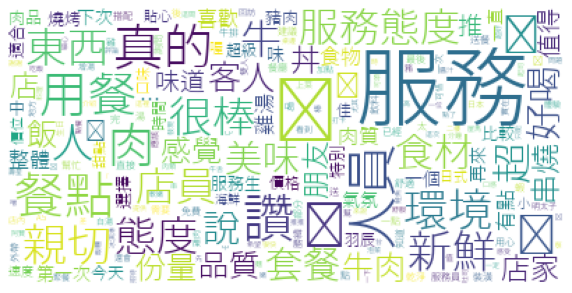

In [ ]:
diction = Counter(terms_drop)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
#mask = np.array(Image.open("heart2.jpeg")) 
wordcloud = WordCloud(background_color="white", font_path='taipei_sans_tc_beta.ttf')#, mask=mask) 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud.to_file("heart.png")

In [ ]:
import numpy as np
# using the savetxt 
# from the numpy module
np.savetxt("text.csv", text, delimiter =", ", fmt ='% s')
np.savetxt("ws.csv", ws, delimiter =", ", fmt ='% s')
np.savetxt("pos.csv", pos, delimiter =", ", fmt ='% s')
np.savetxt("ner.csv", ner, delimiter =", ", fmt ='% s')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


### emoji Âà§Êñ∑
https://pypi.org/project/emoji/  
https://pypi.org/project/emojis/

In [ ]:
import emoji
import emojiswitch
import re
from opencc import OpenCC
terms2 = []
for word in terms_drop:
  #if u"\uE000" <= word and word <= u"\uE900" or u"\U0001F000" <= word and word <= u"\U0001FA99":
  if emoji.is_emoji(word):
    print(word, end='') 
    #print(emoji.demojize(word))
    print(OpenCC('s2twp').convert(emojiswitch.demojize(word, lang = 'zh')), end='')
    emoji_= OpenCC('s2twp').convert(emojiswitch.demojize(word, lang = 'zh'))
    emoji_ = emoji_.replace(":", '')
    print(emoji_)
    terms2.append(emoji_)
  else:
    terms2.append(word)

üòÅ:Á¨ëÁúØÁúØÁöÑËáâ:Á¨ëÁúØÁúØÁöÑËáâ
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üòÖ:ÊªøËáâÊ±óÊ∞¥:ÊªøËáâÊ±óÊ∞¥
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üèΩ:‰∏≠Á≠âËÜöËâ≤:‰∏≠Á≠âËÜöËâ≤
üëè:ÊãçÊâã:ÊãçÊâã
üèª:Ê∑∫ËÜöËâ≤:Ê∑∫ËÜöËâ≤
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üèª:Ê∑∫ËÜöËâ≤:Ê∑∫ËÜöËâ≤
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üèª:Ê∑∫ËÜöËâ≤:Ê∑∫ËÜöËâ≤
ü§£:Âú®Âú∞Êùø‰∏äÊâìÊªæÂ§ßÁ¨ë:Âú®Âú∞Êùø‰∏äÊâìÊªæÂ§ßÁ¨ë
üòã:ÂìÅÂöêÈ£üÁâ©ÁöÑËáâ:ÂìÅÂöêÈ£üÁâ©ÁöÑËáâ
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üòã:ÂìÅÂöêÈ£üÁâ©ÁöÑËáâ:ÂìÅÂöêÈ£üÁâ©ÁöÑËáâ
ü•≥:Ê¥æÂ∞çËáâ:Ê¥æÂ∞çËáâ
ü§ô:Âè´ÊàëÊâã:Âè´ÊàëÊâã
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
ü•∞:‰∏âÈ°ÜÂøÉÁöÑÁ¨ëËáâ:‰∏âÈ°ÜÂøÉÁöÑÁ¨ëËáâ
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üëç:Ë±éËµ∑Â§ßÊãáÊåá:Ë±éËµ∑Â§ßÊãáÊåá
üòã:ÂìÅÂöêÈ£üÁâ©ÁöÑËáâ:ÂìÅÂöêÈ£üÁâ©ÁöÑËáâ
üëç:Ë±éËµ∑Â

In [ ]:
terms_drop2 = [i for i in terms2 if i not in['ÁÉ§ËÇâ', 'ÁáíËÇâ', 'Â•ΩÂêÉ','ÁÉ§', 'ÂêÉ', '‰∏çÈåØ', '‰æøÁï∂', 'Êé®Ëñ¶']] 

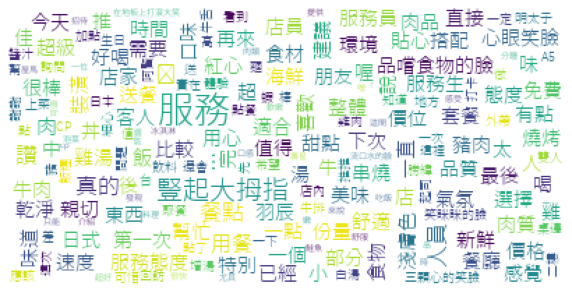

In [ ]:
diction = Counter(terms2)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
#mask = np.array(Image.open("heart2.jpeg")) 
wordcloud = WordCloud(background_color="white", font_path='taipei_sans_tc_beta.ttf')#, mask=mask) 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud.to_file("heart.png")

## ÂêÑÂüéÂ∏ÇÊñáÂ≠óÂàÜÊûê

### ÊØîËºÉÂêÑÁ∏£Â∏ÇÁáíËÇâÂ∫óÁãÄÊ≥ÅÔºüÔºü

In [134]:
import os 
import requests
import pandas as pd


In [135]:
os.chdir('C:\\Users\\YAN\\Downloads\\sele9999')

df_all = pd.DataFrame()
for floder in filter(lambda x : x.endswith('_data'), os.listdir()):
  print(floder)
  for csv in filter(lambda x : x.endswith('_ÊäìÂèñÁïôË®Ä.csv'), os.listdir(floder)):
    print(csv)
    df = pd.read_csv(floder + '/' + csv)
    df_all = pd.concat([df_all, df], axis=0)

Âè∞‰∏≠ÂåóÂ±ØÂçÄÁáíËÇâ_data
Âè∞‰∏≠ÂåóÂ±ØÂçÄÁáíËÇâ_ÊäìÂèñÁïôË®Ä.csv
Âè∞‰∏≠ÂçóÂ±ØÂçÄÁáíËÇâ_data
Âè∞‰∏≠ÂçóÂ±ØÂçÄÁáíËÇâ_ÊäìÂèñÁïôË®Ä.csv
Âè∞ÂåóÂ§ßÂÆâÂçÄÁáíËÇâ_data
Âè∞ÂåóÂ§ßÂÆâÂçÄÁáíËÇâ_ÊäìÂèñÁïôË®Ä.csv
Âè∞ÂçóÂåóÂçÄÁáíËÇâ_data
Âè∞ÂçóÂåóÂçÄÁáíËÇâ_ÊäìÂèñÁïôË®Ä.csv
È´òÈõÑ‰∏âÊ∞ëÂçÄÁáíËÇâ_data
È´òÈõÑ‰∏âÊ∞ëÂçÄÁáíËÇâ_ÊäìÂèñÁïôË®Ä.csv


In [136]:
print(f"ÈáçË§áË≥áÊñô: {df_all['Âú∞ÂùÄ'].duplicated().sum()}")
df_all.info()

ÈáçË§áË≥áÊñô: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Â∫óÂêç      16 non-null     object 
 1   Á∂≤ÂùÄ      16 non-null     object 
 2   ÊòüÁ¥ö      16 non-null     float64
 3   Ë©ïË´ñÊï∏Èáè    16 non-null     int64  
 4   ÂõûÂæ©      16 non-null     object 
 5   Âú∞ÂùÄ      16 non-null     object 
 6   ÂàÜÈ°û      16 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.0+ KB


In [137]:
df_byCat = df_all.groupby('ÂàÜÈ°û').agg({'Â∫óÂêç': ['count'], 'ÊòüÁ¥ö': ['mean', 'min', 'max'], 'Ë©ïË´ñÊï∏Èáè': ['mean', 'min', 'max']})
df_byCat

Â∫óÂêç        ÊòüÁ¥ö                   Ë©ïË´ñÊï∏Èáè            
        count      mean  min  max         mean   min   max
ÂàÜÈ°û                                                        
Êó•ÂºèÁÉ§Èõû‰∏≤È§êÂª≥     1  4.800000  4.8  4.8  2163.000000  2163  2163
Êó•ÂºèÁáíËÇâÈ§êÂª≥     12  4.766667  4.6  4.9  5015.916667  2046  8418
ÈÖíÂêßÊâíÊàø        1  4.700000  4.7  4.7  3793.000000  3793  3793
ÈüìÂºèÁáíÁÉ§È§êÂª≥      1  4.700000  4.7  4.7  3833.000000  3833  3833
È§êÂª≥          1  4.800000  4.8  4.8  3567.000000  3567  3567

In [138]:
city = ['Ëá∫ÂåóÂ∏Ç', 'Âè∞ÂåóÂ∏Ç', 'Êñ∞ÂåóÂ∏Ç', 'Ê°ÉÂúíÂ∏Ç', 'Ëá∫‰∏≠Â∏Ç', 'Âè∞‰∏≠Â∏Ç', 'Ëá∫ÂçóÂ∏Ç', 'Âè∞ÂçóÂ∏Ç',
        'È´òÈõÑÂ∏Ç', 'Êñ∞Á´πÁ∏£', 'ËãóÊ†óÁ∏£', 'ÂΩ∞ÂåñÁ∏£', 'ÂçóÊäïÁ∏£', 'Èõ≤ÊûóÁ∏£', 'ÂòâÁæ©Á∏£', 'Â±èÊù±Á∏£',
        'ÂÆúËò≠Á∏£', 'Ëä±ËìÆÁ∏£', 'Ëá∫Êù±Á∏£', 'Âè∞Êù±Á∏£', 'ÊæéÊπñÁ∏£', 'ÈáëÈñÄÁ∏£', 'ÈÄ£Ê±üÁ∏£', 'Âü∫ÈöÜÂ∏Ç', 'Êñ∞Á´πÂ∏Ç', 'ÂòâÁæ©Â∏Ç']
df_all['ÂüéÂ∏Ç']= df_all['Âú∞ÂùÄ'].str.findall('|'.join(city)).str.join(", ")

In [139]:
df_byCity = df_all.groupby('ÂüéÂ∏Ç').agg({'Â∫óÂêç': ['count'], 'ÊòüÁ¥ö': ['mean', 'min', 'max'], 'Ë©ïË´ñÊï∏Èáè': ['mean', 'min', 'max']})
df_byCity

Â∫óÂêç    ÊòüÁ¥ö              Ë©ïË´ñÊï∏Èáè            
    count  mean  min  max    mean   min   max
ÂüéÂ∏Ç                                           
Âè∞‰∏≠Â∏Ç    10  4.76  4.6  4.9  4391.0  2046  8418
Âè∞ÂåóÂ∏Ç     1  4.90  4.9  4.9  5662.0  5662  5662
Âè∞ÂçóÂ∏Ç     4  4.75  4.7  4.8  5035.5  3567  7343
È´òÈõÑÂ∏Ç     1  4.70  4.7  4.7  3833.0  3833  3833

In [140]:
df_review = pd.DataFrame()
df_review['ÂüéÂ∏Ç'] = list(df_byCity.index)
df_review['Ë©ïË´ñ'] = ''
df_review = df_review.set_index('ÂüéÂ∏Ç')
df_review

Ë©ïË´ñ
ÂüéÂ∏Ç    
Âè∞‰∏≠Â∏Ç   
Âè∞ÂåóÂ∏Ç   
Âè∞ÂçóÂ∏Ç   
È´òÈõÑÂ∏Ç

In [141]:
for city in list(df_byCity.index):
  review_temp = ''
  review_analytics = []
  for review in df_all.loc[df_all['ÂüéÂ∏Ç'] == city, 'ÂõûÂæ©']:
    review_temp += review
  #print(city, review_temp)
  #df_byCity.loc[city, 'ÂõûÂæ©'] = review_temp
  review_temp = review_temp.replace('[', '').replace(']', '').replace('(Áî± Google Êèê‰æõÁøªË≠Ø)','').replace('(ÂéüÂßãË©ïË´ñ)','').replace('\\n',',')
  for i, j in enumerate(review_temp.split("'")):
    if j not in ['', ', ', ' ']:
      review_analytics.append(j)
  #print(city)
  df_review.loc[city, 'Ë©ïË´ñ'] = review_analytics
df_review

Ë©ïË´ñ
ÂüéÂ∏Ç                                                    
Âè∞‰∏≠Â∏Ç  [ÂæàË¨ùË¨ù ÊúçÂãôÁîüÁê§Ëã° ÔºåËæõËã¶‰∫Ü, Áî®È§êÁí∞Â¢ÉËàíÈÅ©,Â∫ß‰ΩçÂæàÂ§ß,È£üÁâ©ÂöêËµ∑‰æÜÂè£ÊÑüÈÉΩÂêÉÂæóÂá∫È£üÊùêÊòØÊñ∞ÈÆÆÁöÑ...
Âè∞ÂåóÂ∏Ç  [Ë±¨ËÇâÊñ∞ÈÆÆÂ•ΩÂêÉ,ÂæàÂ∞ëÂêÉÂà∞‰∫îÂàÜÁÜüÁöÑ,ÊáâË©≤ÊòØÂ∞èÁéâÁ±≥ Â∞èÁôΩÈ£ØÁÉ§ÂæóÂ•Ω, Êï¥È´î‰∏çÈåØÂêÉÔºåÊé®Ëä±ÊûùÔΩû,Â∞èÂ±±Ëó•...
Âè∞ÂçóÂ∏Ç  [Â•ΩÂêÉÁöÑÊó•Êú¨ÂíåÁâõ‰∏ÄÂÆöË¶Å‰æÜÈÄôÈÇäÂêÉÔºÅ, Âè∞ÁÅ£ÊúÄÂº∑ÁáíËÇâ!!!!‰æÜÂè∞ÂçóÂøÖÂêÉÂï¶!!!!, Êù±Ë•øÂ•ΩÂêÉÔºÅÂêÉ...
È´òÈõÑÂ∏Ç  [Âπ≥ÂÉπ Â•ΩÂêÉ ËÇâÂ§ßÂ°äÁ®ÆÈ°ûÂæàÂ§öÁÅ´Èçã‰∏ÄÊ°åÊúâ2ÈºéÁÉ§Áõ§‰πüÂæàÂ§ßÊ∞£ÁöÑÁî®ÊñπÂûãÂ§ßÁÉ§Áõ§ ‰∏çÊúÉÂÉèÂà•ÂÆ∂Â∞èÂ∞èÊ∞£ 4ÔΩû...

In [142]:
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)


In [143]:
import emojis

In [144]:
# Á¢∫Ë™çÊòØÂê¶ÁÇ∫‰∏≠Êñá
def is_contains_chinese(strs):
    for _char in strs:
        if '\u4e00' <= _char <= '\u9fa5':
            return True
    return False

In [145]:
adv_list = ['ÁúüÁöÑ', '‰∏çÈåØ', 'Ë¶∫Âæó', 'Â•ΩÂÉè', '  ']
for word in adv_list:
  stops.append(word)

NameError: name 'stops' is not defined

In [ ]:
review_analytics = df_review.loc['Âè∞‰∏≠Â∏Ç', 'Ë©ïË´ñ']
for text in review_analytics:
  for t in jieba.cut(text, cut_all=False):
    if t not in stops and emojis.get(t) == set() and is_contains_chinese(t):
      print(t)
      print(emojis.get(t))

Âè∞‰∏≠Â∏Ç
[('ÊúçÂãô', 462), ('Â•ΩÂêÉ', 332), ('‰∫∫Âì°', 142), ('ËÇâ', 110), ('Áâõ', 97), ('Ë¶™Âàá', 79), ('ÁÉ§', 78), ('Áî®È§ê', 77), ('ËÇâÂìÅ', 77), ('Â•óÈ§ê', 74)]


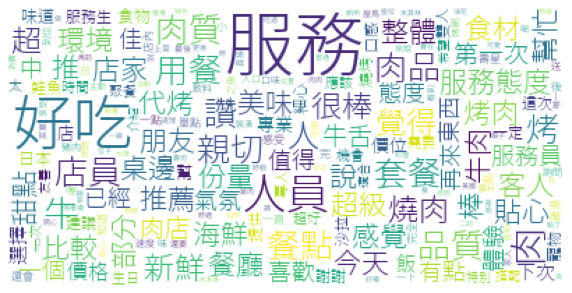

Âè∞ÂåóÂ∏Ç
[('ÊúçÂãô', 424), ('Â•ΩÂêÉ', 333), ('ÁÉ§', 126), ('Áâõ', 112), ('ËÇâ', 108), ('Áî®È§ê', 99), ('ÁáíËÇâ', 98), ('‰∫∫Âì°', 97), ('ËÆö', 94), ('Â∫óÂì°', 90)]


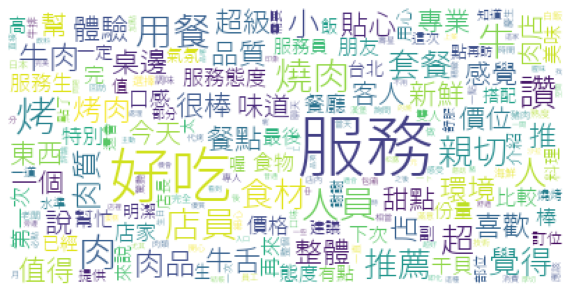

Âè∞ÂçóÂ∏Ç
[('Â•ΩÂêÉ', 352), ('ÊúçÂãô', 346), ('ÁÉ§', 147), ('ËÇâ', 121), ('‰∫∫Âì°', 109), ('Â∫óÂì°', 109), ('Áî®È§ê', 92), ('Ë™™', 90), ('ÁáíËÇâ', 79), ('Êñ∞ÈÆÆ', 78)]


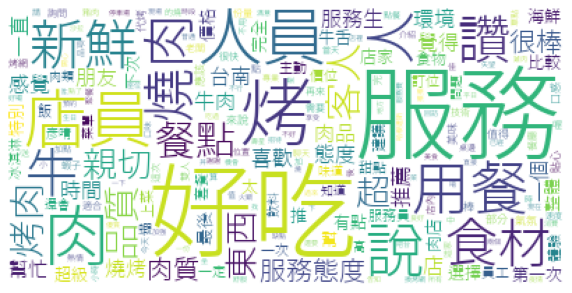

ÂòâÁæ©Â∏Ç
[('ÊúçÂãô', 250), ('Â•ΩÂêÉ', 241), ('Ë¶™Âàá', 66), ('‰∫∫Âì°', 64), ('È£üÊùê', 62), ('ËÇâ', 60), ('ÁÉ§', 60), ('ËÆö', 58), ('Êñ∞ÈÆÆ', 54), ('ÊúçÂãôÊÖãÂ∫¶', 50)]


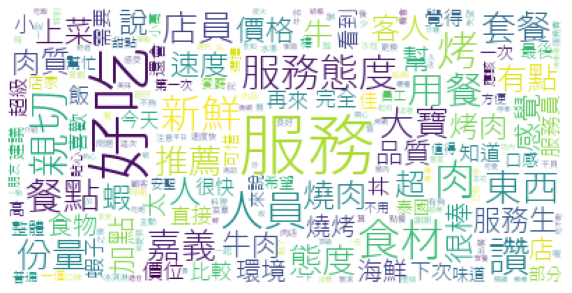

Âü∫ÈöÜÂ∏Ç
[('ÊúçÂãô', 204), ('Â•ΩÂêÉ', 156), ('ËÇâ', 67), ('Áî®È§ê', 62), ('‰∫∫Âì°', 57), ('Â∫óÂì°', 54), ('ËÆö', 51), ('Êñ∞ÈÆÆ', 47), ('È£üÊùê', 44), ('Ë¶™Âàá', 41)]


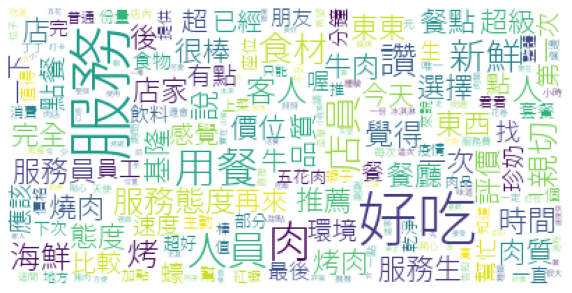

Êñ∞ÂåóÂ∏Ç
[('Â•ΩÂêÉ', 290), ('ÊúçÂãô', 277), ('Â∫óÂì°', 83), ('ÁÉ§', 82), ('Ë¶™Âàá', 80), ('ËÇâ', 76), ('‰∫∫Âì°', 71), ('Êñ∞ÈÆÆ', 69), ('Áî®È§ê', 64), ('È£üÊùê', 62)]


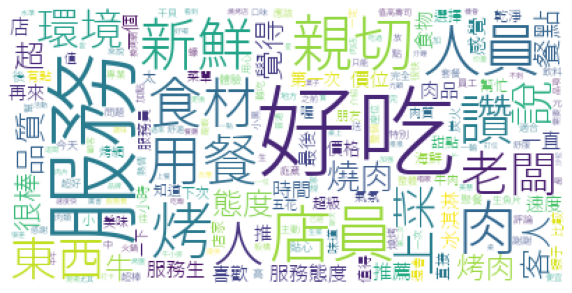

Êñ∞Á´πÂ∏Ç
[('Â•ΩÂêÉ', 263), ('ÊúçÂãô', 175), ('ÁÉ§', 67), ('ËÇâ', 65), ('Â∫óÂì°', 65), ('Êñ∞ÈÆÆ', 65), ('È£üÊùê', 55), ('Áâõ', 53), ('Áî®È§ê', 50), ('ËÆö', 47)]


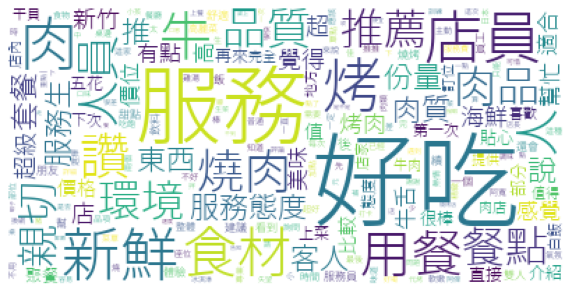

Ê°ÉÂúíÂ∏Ç
[('Â•ΩÂêÉ', 404), ('ÊúçÂãô', 347), ('È£üÊùê', 94), ('Êñ∞ÈÆÆ', 94), ('ËÇâ', 91), ('‰∫∫Âì°', 89), ('ÁÉ§', 89), ('Â∫óÂì°', 81), ('ËÆö', 77), ('Áî®È§ê', 74)]


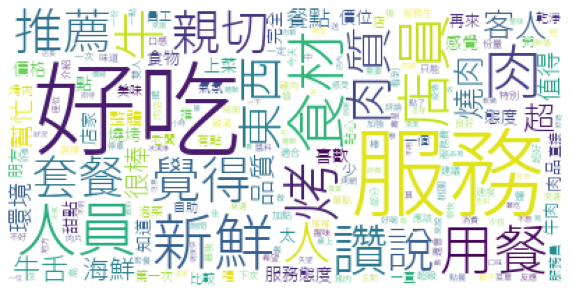

È´òÈõÑÂ∏Ç
[('ÊúçÂãô', 398), ('Â•ΩÂêÉ', 329), ('‰∫∫Âì°', 137), ('Áî®È§ê', 111), ('ÁÉ§', 111), ('È£üÊùê', 98), ('Êñ∞ÈÆÆ', 93), ('ËÇâ', 92), ('Ë¶™Âàá', 88), ('Â∫óÂì°', 80)]


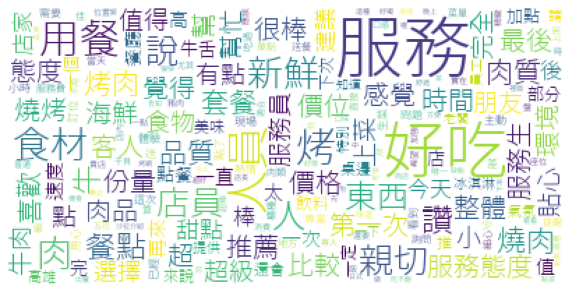

In [ ]:
for city in list(df_review.index):
  review_analytics = df_review.loc[city, 'Ë©ïË´ñ']
  terms = []
  for text in review_analytics:
    for t in jieba.cut(text, cut_all=False):
        if t not in stops and emojis.get(t) == set() and is_contains_chinese(t):
            terms.append(t)
  diction = Counter(terms)
  print(city)
  print(diction.most_common(10))
  #wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
  #mask = np.array(Image.open("heart2.jpeg")) 
  wordcloud = WordCloud(background_color="white", font_path='taipei_sans_tc_beta.ttf')#, mask=mask) 
  wordcloud.generate_from_frequencies(frequencies=diction)
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()